# Kaggle Competition: Store Sales - Time Series Forecasting
### Goal:  Build a model that more accurately predicts the unit sales for thousands of items sold at different stores
* Predicting the 'sales' variable
### Evaluation Metric:  Root Mean Squared Logarithmic Error (RMSLE)
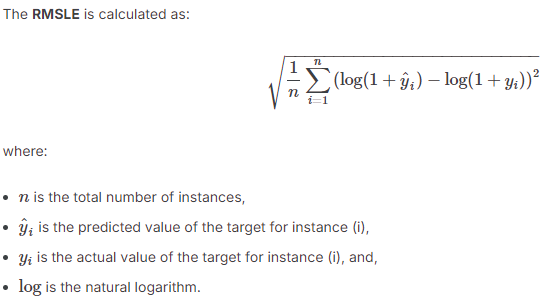

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
holidays_events = pd.read_csv('data/holidays_events.csv')
oil = pd.read_csv('data/oil.csv')
stores = pd.read_csv('data/stores.csv')
transactions = pd.read_csv('data/transactions.csv')

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

sample_submission = pd.read_csv('data/sample_submission.csv')

# Exploring each file

## holidays_events

In [39]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [41]:
holidays_events.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


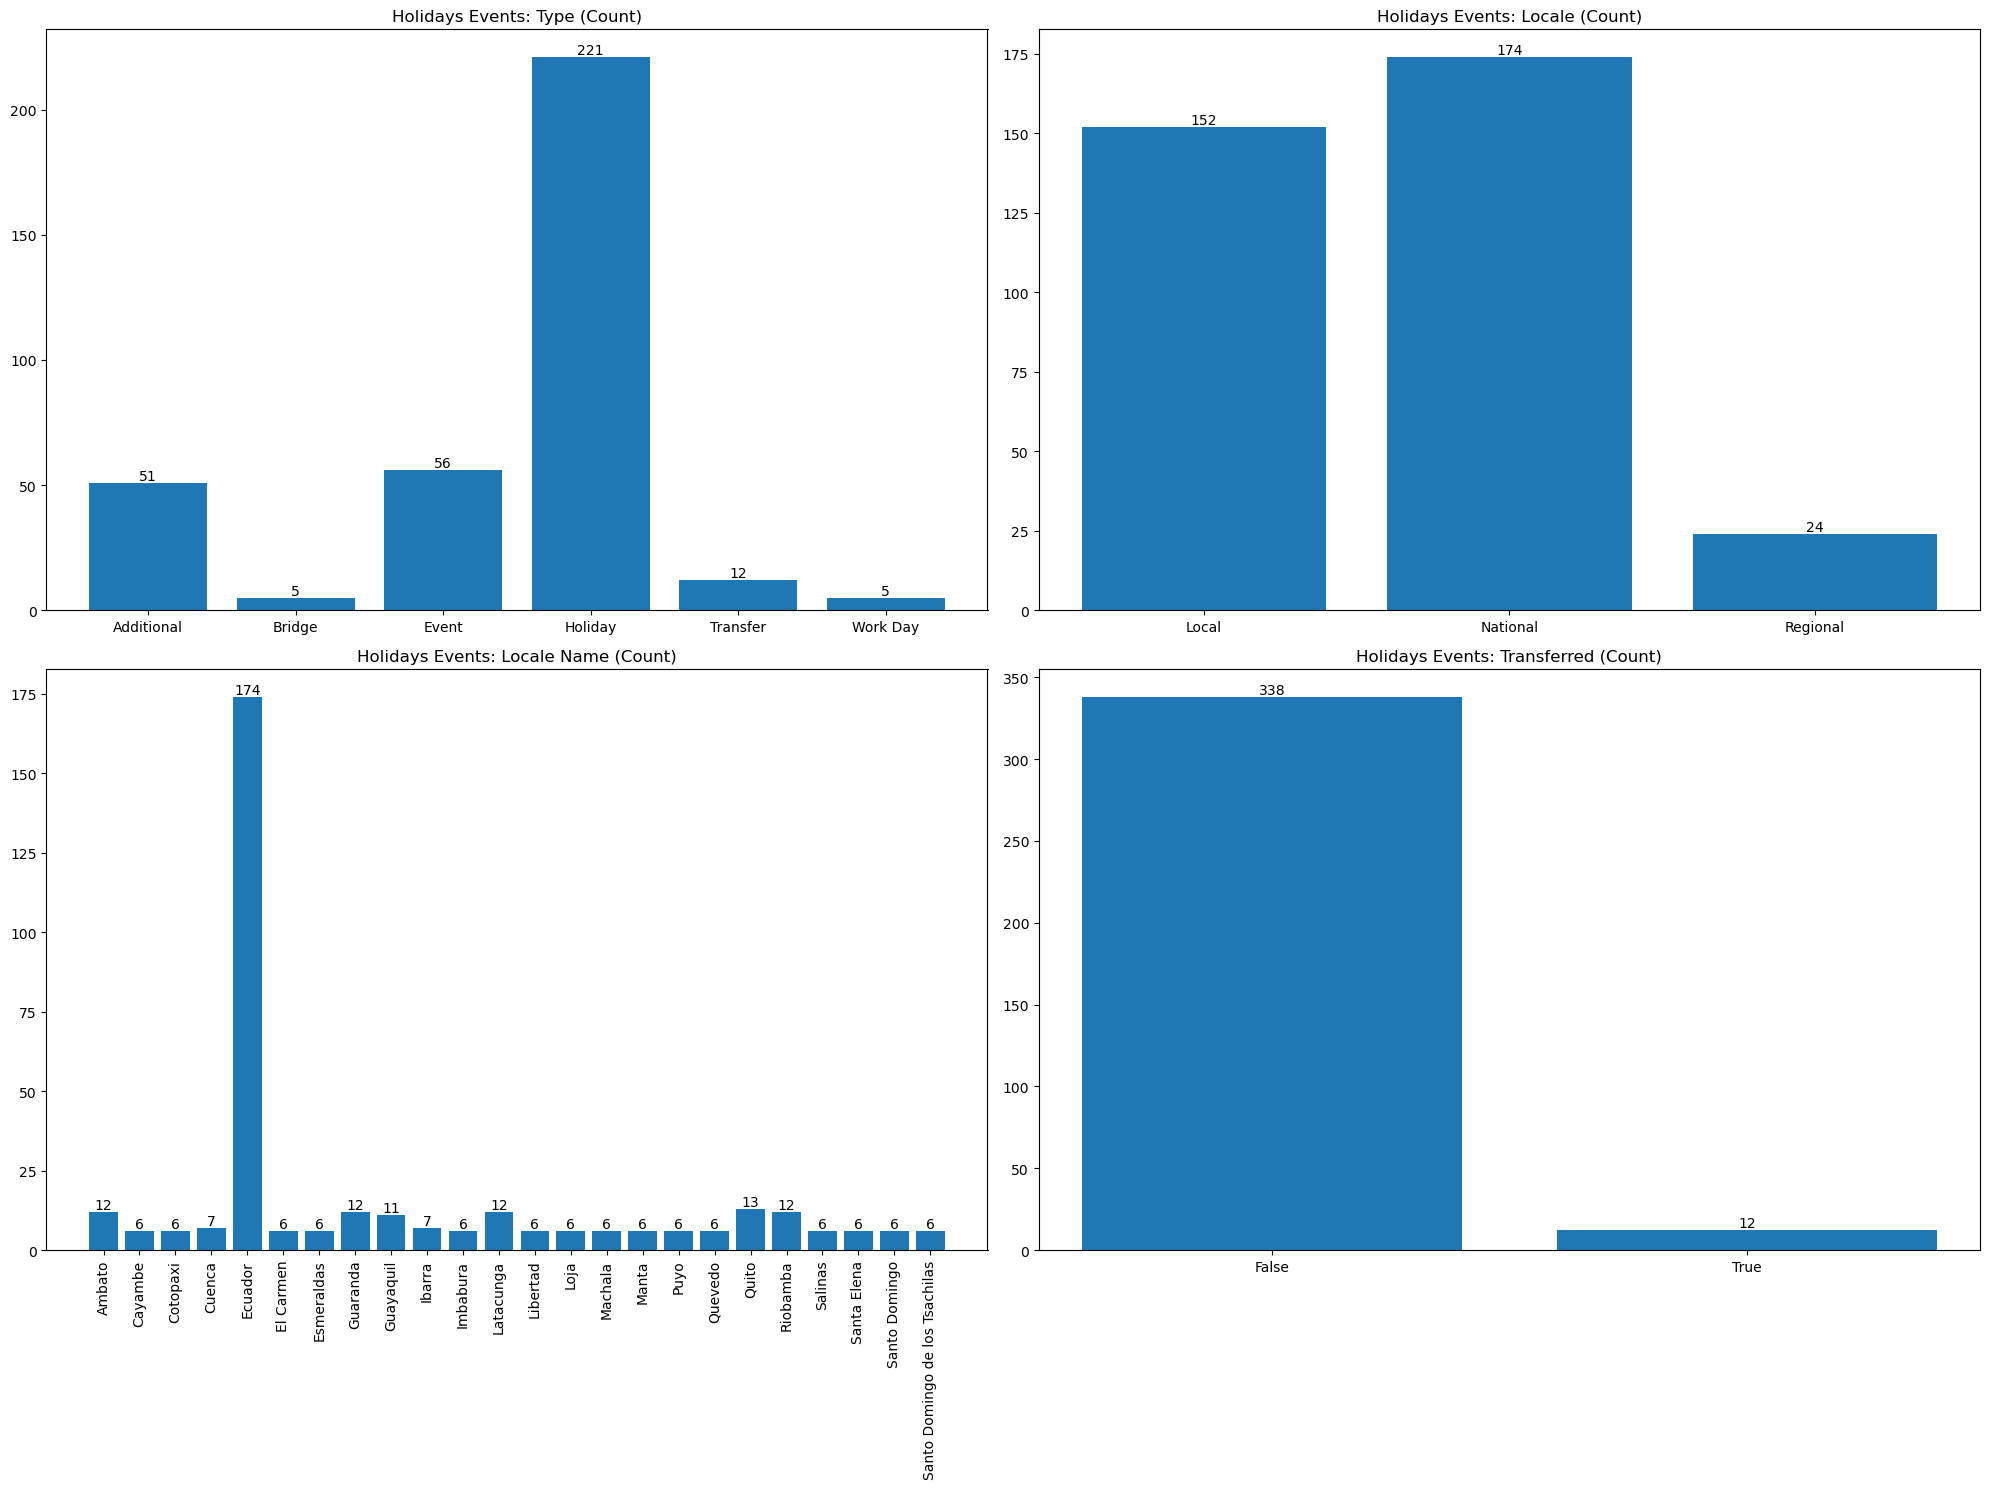

In [121]:
fig, axs = plt.subplots(2,2, figsize = (20,15))

holev_type = np.unique(holidays_events.type, return_counts=True)
holev_locale = np.unique(holidays_events.locale, return_counts=True)
holev_locale_name = np.unique(holidays_events.locale_name, return_counts=True)
holev_transferred = np.unique(holidays_events.transferred, return_counts=True)

axs[0,0].bar(*holev_type, align = 'center')
axs[0,1].bar(*holev_locale, align = 'center')
axs[1,0].bar(*holev_locale_name, align = 'center')
axs[1,1].bar(*holev_transferred, align = 'center')

axs[0,0].set_title('Holidays Events: Type (Count)')
axs[0,1].set_title('Holidays Events: Locale (Count)')
axs[1,0].set_title('Holidays Events: Locale Name (Count)')
axs[1,1].set_title('Holidays Events: Transferred (Count)')

axs[1,0].tick_params(axis = 'x', labelrotation = 90)
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(['False', 'True'])

def bar_amounts(data, pos):
    for i, count in enumerate(data[1]):
        axs[*pos].text(i, count, str(count), ha = 'center', va = 'bottom')

bar_amounts(holev_type, [0,0])
bar_amounts(holev_locale, [0,1])
bar_amounts(holev_locale_name, [1,0])
bar_amounts(holev_transferred, [1,1])

fig.tight_layout()
plt.show()